In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore

warnings.filterwarnings('ignore')

warnings.simplefilter(action="ignore", category=FutureWarning)

plt.rcParams["figure.figsize"] = [10, 5]  

pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jhhalls/Data-Analysis/refs/heads/main/Datasets/matches.csv")
print(f"IPL dataframe : \n{df}")

IPL dataframe : 
           id   season            city        date          match_type  \
0      335982  2007/08       Bangalore  2008-04-18              League   
1      335983  2007/08      Chandigarh  2008-04-19              League   
2      335984  2007/08           Delhi  2008-04-19              League   
3      335985  2007/08          Mumbai  2008-04-20              League   
4      335986  2007/08         Kolkata  2008-04-20              League   
5      335987  2007/08          Jaipur  2008-04-21              League   
6      335988  2007/08       Hyderabad  2008-04-22              League   
7      335989  2007/08         Chennai  2008-04-23              League   
8      335990  2007/08       Hyderabad  2008-04-24              League   
9      335991  2007/08      Chandigarh  2008-04-25              League   
10     335992  2007/08       Bangalore  2008-04-26              League   
11     335993  2007/08         Chennai  2008-04-26              League   
12     335994  2007/0

In [ ]:
EASY

In [10]:
#1.How many total matches have been played in IPL history?

In [25]:
total_matches = df.shape[0]
print(f"1. Total matches played: {total_matches}")


1. Total matches played: 1095


In [3]:
df.tail(1)[['id', 'season', 'date']]

,id,season,date
1094,1426312,2024,2024-05-26


In [13]:
# 2.In which city have the most matches been played?

In [23]:
most_matches_city = df['city'].value_counts().idxmax()
print(f"2. City with most matches: {most_matches_city}")


2. City with most matches: Mumbai


In [16]:
# 3.Top 5 venues where most matches were played

In [26]:
top_5_venues = df['venue'].value_counts().head(5)

print("3. Top 5 most common venues:")
print(top_5_venues)

3. Top 5 most common venues:
venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64


In [27]:
# 4.Which seasons had the highest number of matches?

In [28]:
most_matches_season = df['season'].value_counts().head(5)
print("4. Seasons with most matches:")
print(most_matches_season)


4. Seasons with most matches:
season
2013    76
2023    74
2012    74
2022    74
2011    73
Name: count, dtype: int64


In [29]:
# 5.How many matches went to a super over?

In [30]:
super_over_matches = df[df['super_over'] == 'Y'].shape[0]
print(f"5. Matches with Super Over: {super_over_matches}")

5. Matches with Super Over: 14


In [32]:
# 6.What are the different types of results recorded?

In [35]:
result_types = df['result'].unique()
print("6. Types of match results:", result_types)

6. Types of match results: ['runs' 'wickets' 'tie' 'no result']


In [36]:
# 7. Which team has won the most matches overall?

In [37]:
most_winning_team = df['winner'].value_counts().idxmax()
most_wins = df['winner'].value_counts().max()
print(f"7. Team with most wins: {most_winning_team} ({most_wins} wins)")


7. Team with most wins: Mumbai Indians (144 wins)


In [38]:
# 8. Which player has won the most Player of the Match awards?

In [39]:
most_pom_player = df['player_of_match'].value_counts().idxmax()
most_pom_count = df['player_of_match'].value_counts().max()
print(f"8. Most 'Player of the Match' awards: {most_pom_player} ({most_pom_count} times)")


8. Most 'Player of the Match' awards: AB de Villiers (25 times)


In [40]:
# 9. How many matches were won by chasing vs defending?

In [42]:
chasing_wins = df[df['result'] == 'wickets'].shape[0]
defending_wins = df[df['result'] == 'runs'].shape[0]
print(f"9. Matches won by chasing: {chasing_wins}, by defending: {defending_wins}")


9. Matches won by chasing: 578, by defending: 498


In [43]:
# 10. What is the average winning margin in runs vs wickets?

In [44]:
avg_margin_runs = df[df['result'] == 'runs']['result_margin'].mean()
avg_margin_wickets = df[df['result'] == 'wickets']['result_margin'].mean()
print(f"10. Average winning margin (runs): {avg_margin_runs:.2f}")
print(f"    Average winning margin (wickets): {avg_margin_wickets:.2f}")

10. Average winning margin (runs): 30.10
    Average winning margin (wickets): 6.19


INTERMEDIATE

In [ ]:
# 1. Toss vs Match Winner: Does winning the toss increase the chances of winning the match?

In [4]:
same_winner = df[df['toss_winner'] == df['winner']]
count_same = same_winner.shape[0]
total_matches = df[df['winner'].notna()].shape[0]  
percentage = (count_same / total_matches) * 100
print("1. Toss winner also won match in", count_same, "matches.")
print("Win percentage after winning toss:", round(percentage, 2), "%")

1. Toss winner also won match in 554 matches.
Win percentage after winning toss: 50.83 %


In [47]:
# 2. Which team has the highest win % in each season?

In [5]:
df_season = df[df['winner'].notna()]
wins = df_season.groupby(['season', 'winner']).size().reset_index(name='wins')
team_matches = pd.concat([
    df_season[['season', 'team1']].rename(columns={'team1': 'team'}),
    df_season[['season', 'team2']].rename(columns={'team2': 'team'})
])
team_matches['match'] = 1
team_matches = team_matches.groupby(['season', 'team']).count().reset_index()
win_percent = pd.merge(wins, team_matches, left_on=['season', 'winner'], right_on=['season', 'team'])
win_percent['win_percent'] = (win_percent['wins'] / win_percent['match']) * 100
top_win_percent = win_percent.loc[win_percent.groupby('season')['win_percent'].idxmax()][['season', 'team', 'win_percent']]
print(top_win_percent)

      season                   team  win_percent
6    2007/08       Rajasthan Royals    81.250000
10      2009       Delhi Daredevils    66.666667
21   2009/10         Mumbai Indians    68.750000
24      2011    Chennai Super Kings    68.750000
38      2012  Kolkata Knight Riders    70.588235
47      2013         Mumbai Indians    68.421053
54      2014        Kings XI Punjab    70.588235
64      2015         Mumbai Indians    62.500000
75      2016    Sunrisers Hyderabad    64.705882
80      2017         Mumbai Indians    70.588235
84      2018    Chennai Super Kings    68.750000
96      2019         Mumbai Indians    68.750000
104  2020/21         Mumbai Indians    68.750000
108     2021    Chennai Super Kings    68.750000
118     2022         Gujarat Titans    75.000000
126     2023    Chennai Super Kings    66.666667
139     2024  Kolkata Knight Riders    78.571429


In [ ]:
# 3. Which team has the best record at each major venue?


In [7]:
df1 = df[df['winner'].notna() & df['venue'].notna()]
venue_wins = df1.groupby(['venue', 'winner']).size().reset_index(name='wins')
top_teams = venue_wins.sort_values(['venue', 'wins'], ascending=[True, False]).drop_duplicates('venue')
print(top_teams[['venue', 'winner', 'wins']])

                                                 venue  \
1                                 Arun Jaitley Stadium   
8                          Arun Jaitley Stadium, Delhi   
14                                    Barabati Stadium   
17                 Barsapara Cricket Stadium, Guwahati   
22   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   
27                                   Brabourne Stadium   
31                           Brabourne Stadium, Mumbai   
38                                        Buffalo Park   
41                               De Beers Diamond Oval   
48                          Dr DY Patil Sports Academy   
52                  Dr DY Patil Sports Academy, Mumbai   
69   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
70   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
72                 Dubai International Cricket Stadium   
88                                        Eden Gardens   
96                               Eden Gardens, Kolkata   
104           

In [9]:
# 4. Are there any cities/venues where chasing is significantly better than defending?


In [10]:
df1 = df[df['result'].isin(['runs', 'wickets'])]
runs = df1[df1['result'] == 'runs'].groupby('venue').size()
wickets = df1[df1['result'] == 'wickets'].groupby('venue').size()

total = runs.add(wickets, fill_value=0)
chasing_percent = (wickets / total) * 100

print(chasing_percent[chasing_percent > 60].sort_values(ascending=False))

venue
Green Park                                          100.000000
Holkar Cricket Stadium                               88.888889
JSCA International Stadium Complex                   71.428571
Sawai Mansingh Stadium                               68.085106
De Beers Diamond Oval                                66.666667
Saurashtra Cricket Association Stadium               66.666667
Shaheed Veer Narayan Singh International Stadium     66.666667
SuperSport Park                                      66.666667
Sharjah Cricket Stadium                              64.285714
Maharashtra Cricket Association Stadium              63.636364
Narendra Modi Stadium, Ahmedabad                     62.500000
New Wanderers Stadium                                62.500000
Zayed Cricket Stadium, Abu Dhabi                     62.500000
dtype: float64


In [12]:
# 5. What is the most common toss decision, and how has it changed over time?


In [13]:
common = df['toss_decision'].value_counts()
print("Most common toss decision:")
print(common)

trend = df.groupby('season')['toss_decision'].value_counts().unstack()
print("\nToss decision trend over seasons:")
print(trend)

Most common toss decision:
toss_decision
field    704
bat      391
Name: count, dtype: int64

Toss decision trend over seasons:
toss_decision  bat  field
season                   
2007/08         26     32
2009            35     22
2009/10         39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50
2020/21         27     33
2021            16     44
2022            15     59
2023            21     53
2024            19     52


In [14]:
# 6. Who are the top 10 most consistent players (based on number of matches and PoM awards)?

In [15]:
pom = df['player_of_match'].value_counts().head(10)
print("Top 10 players with most Player of the Match awards:")
print(pom)

Top 10 players with most Player of the Match awards:
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64


In [19]:
#7. Which match had the highest winning margin (runs or wickets)?

In [20]:
by_runs = df[df['result'] == 'runs'].sort_values('result_margin', ascending=False).head(1)
by_wickets = df[df['result'] == 'wickets'].sort_values('result_margin', ascending=False).head(1)

print("Match with highest win by runs:")
print(by_runs[['winner', 'result_margin', 'team1', 'team2', 'season', 'date']])

print("\nMatch with highest win by wickets:")
print(by_wickets[['winner', 'result_margin', 'team1', 'team2', 'season', 'date']])

Match with highest win by runs:
             winner  result_margin             team1           team2 season  \
620  Mumbai Indians          146.0  Delhi Daredevils  Mumbai Indians   2017   

           date  
620  2017-05-06  

Match with highest win by wickets:
               winner  result_margin           team1             team2 season  \
239  Rajasthan Royals           10.0  Mumbai Indians  Rajasthan Royals   2011   

           date  
239  2011-05-20  


In [21]:
# 8. Has the number of matches with Super Overs increased or decreased over time?


In [29]:
super_over = df[df['super_over'] == 'Y']
count_by_season = super_over['season'].value_counts().sort_index()
print("Super Over matches per season:")
print(count_by_season)

# Check trend: first vs last

first_season = count_by_season.index[0]
last_season = count_by_season.index[-1]

first = count_by_season[first_season]
last = count_by_season[last_season]

if last > first:
    print("\nTrend: Super Overs have increased.")
elif last < first:
    print("\nTrend: Super Overs have decreased.")
else:
    print("\nTrend: Super Overs stayed the same.")

Super Over matches per season:
season
2009       1
2009/10    1
2013       2
2014       1
2015       1
2017       1
2019       2
2020/21    4
2021       1
Name: count, dtype: int64

Trend: Super Overs stayed the same.


In [30]:
# 9. What is the trend of matches decided by less than 10 runs or less than 2 wickets?

In [31]:
a = df[(df['result'] == 'runs') & (df['result_margin'] < 10)]
b = df[(df['result'] == 'wickets') & (df['result_margin'] < 2)]

print("Matches won by less than 10 runs:")
print(a['season'].value_counts().sort_index())

print("\nMatches won by less than 2 wickets:")
print(b['season'].value_counts().sort_index())

Matches won by less than 10 runs:
season
2007/08     7
2009        7
2009/10     3
2011        4
2012        6
2013        8
2014        3
2015        9
2016        6
2017        6
2018        6
2019        4
2020/21     2
2021        7
2022        7
2023       12
2024        7
Name: count, dtype: int64

Matches won by less than 2 wickets:
season
2015    1
2018    2
2023    1
Name: count, dtype: int64


In [32]:
# 10. Is there any seasonal pattern in toss decisions (e.g., day/night, pitch factor)?

In [33]:
print(df.groupby('season')['toss_decision'].value_counts())

season   toss_decision
2007/08  field            32
         bat              26
2009     bat              35
         field            22
2009/10  bat              39
         field            21
2011     field            48
         bat              25
2012     bat              37
         field            37
2013     bat              45
         field            31
2014     field            41
         bat              19
2015     field            34
         bat              25
2016     field            49
         bat              11
2017     field            48
         bat              11
2018     field            50
         bat              10
2019     field            50
         bat              10
2020/21  field            33
         bat              27
2021     field            44
         bat              16
2022     field            59
         bat              15
2023     field            53
         bat              21
2024     field            52
         bat        

In [36]:
# ADVANCED



In [37]:
# 1. Build a timeline of IPL champions from 2008 to the latest season. Visualize it.

IPL Champions each season:
       season                 winner
57    2007/08       Rajasthan Royals
114      2009        Deccan Chargers
174   2009/10    Chennai Super Kings
247      2011    Chennai Super Kings
321      2012  Kolkata Knight Riders
397      2013         Mumbai Indians
457      2014  Kolkata Knight Riders
516      2015         Mumbai Indians
576      2016    Sunrisers Hyderabad
635      2017         Mumbai Indians
695      2018    Chennai Super Kings
755      2019         Mumbai Indians
815   2020/21         Mumbai Indians
875      2021    Chennai Super Kings
949      2022         Gujarat Titans
1023     2023    Chennai Super Kings
1094     2024  Kolkata Knight Riders


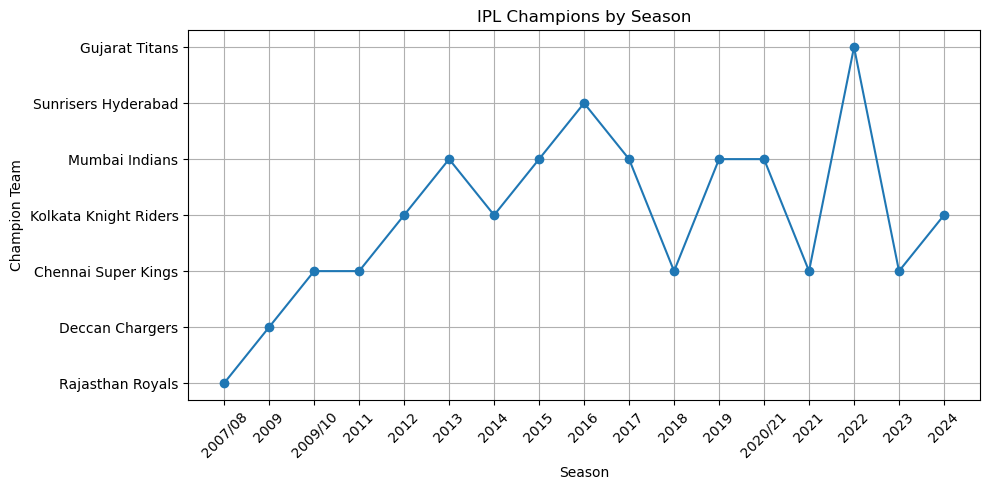

In [42]:
finals = df.sort_values('date').dropna(subset=['winner'])
finals = finals.groupby('season').tail(1)

print("IPL Champions each season:")
print(finals[['season', 'winner']])

plt.figure(figsize=(10,5))
plt.plot(finals['season'], finals['winner'], marker='o')
plt.xticks(rotation=45)
plt.title("IPL Champions by Season")
plt.xlabel("Season")
plt.ylabel("Champion Team")
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# 2. What is the average target set by teams across seasons? Is it increasing?

Average target per season:
season
2007/08    159.775862
2009       148.807018
2009/10    165.783333
2011       154.041667
2012       158.540541
2013       156.894737
2014       162.383333
2015       164.706897
2016       160.783333
2017       165.406780
2018       170.200000
2019       167.733333
2020/21    170.500000
2021       160.316667
2022       172.121622
2023       183.397260
2024       190.591549
Name: target_runs, dtype: float64


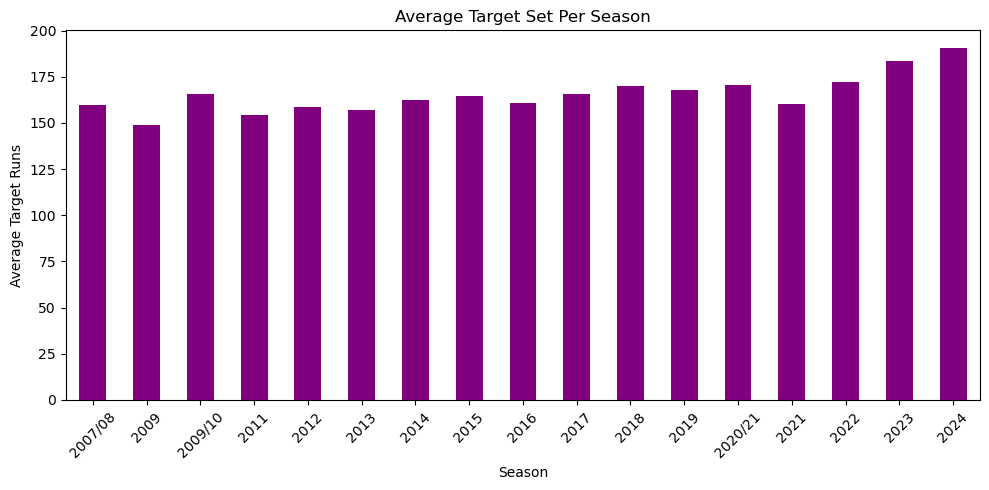


Target scores are increasing.


In [46]:
a = df.dropna(subset=['target_runs'])
avg_target = a.groupby('season')['target_runs'].mean()

print("Average target per season:")
print(avg_target)

# Bar plot
avg_target.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Average Target Set Per Season")
plt.xlabel("Season")
plt.ylabel("Average Target Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# is it increasing
first = avg_target.iloc[0]
last = avg_target.iloc[-1]

if last > first:
    print("\nTarget scores are increasing.")
elif last < first:
    print("\nTarget scores are decreasing.")
else:
    print("\nTarget scores are stable.")

In [48]:
# 3. Analyze the average overs taken to chase targets. Are teams becoming more aggressive?

Average overs taken to chase per season:
season
2007/08    19.941176
2009       19.517241
2009/10    20.000000
2011       19.743590
2012       19.800000
2013       20.000000
2014       19.594595
2015       19.000000
2016       19.717949
2017       19.562500
2018       19.781250
2019       20.000000
2020/21    20.000000
2021       20.000000
2022       20.000000
2023       19.848485
2024       20.000000
Name: target_overs, dtype: float64


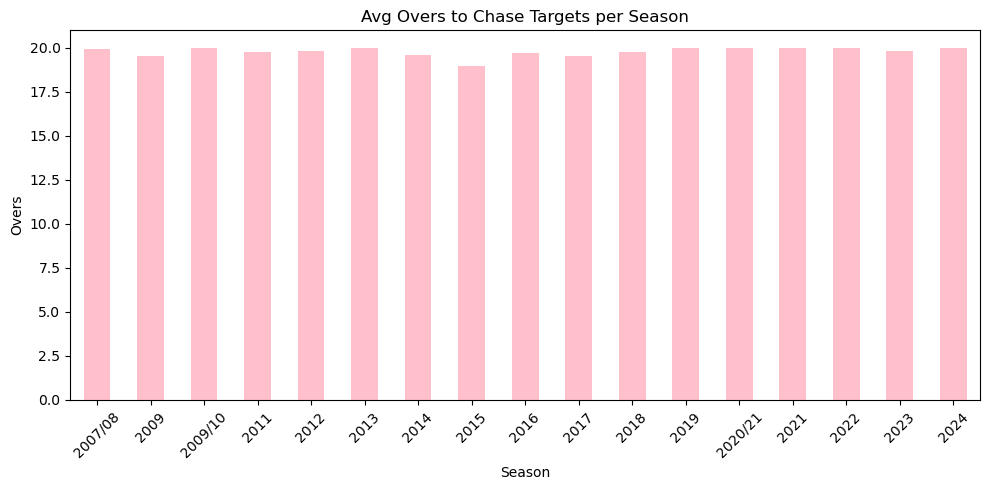


Teams are taking more time to chase (less aggressive).


In [69]:
a = df[(df['result'] == 'wickets') & df['target_overs'].notna()]
avg_overs = a.groupby('season')['target_overs'].mean()

print("Average overs taken to chase per season:")
print(avg_overs)

# Plot to check trend
avg_overs.plot(kind='bar', color='pink', figsize=(10,5))
plt.title("Avg Overs to Chase Targets per Season")
plt.xlabel("Season")
plt.ylabel("Overs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

first = avg_overs.iloc[0]
last = avg_overs.iloc[-1]

if last < first:
    print("\nTeams are becoming more aggressive (chasing in fewer overs).")
elif last > first:
    print("\nTeams are taking more time to chase (less aggressive).")
else:
    print("\nChasing pattern is stable over the years.")

In [50]:
# 4. Find and rank team rivalries based on frequency and closeness (e.g., win % close to 50/50).

In [70]:
df['pair'] = df.apply(lambda x: tuple(sorted([x['team1'], x['team2']])), axis=1)

a = df.groupby(['pair', 'winner']).size().reset_index(name='wins')
total = df['pair'].value_counts().reset_index()
total.columns = ['pair', 'total']

data = pd.merge(a, total, on='pair')
data['win%'] = (data['wins'] / data['total']) * 100
data['closeness'] = abs(50 - data['win%'])

rivalries = data[data['total'] >= 10].sort_values(['closeness', 'total']).head(10)
print(rivalries[['pair', 'winner', 'wins', 'total', 'win%', 'closeness']])

                                                pair  \
72                (Delhi Daredevils, Mumbai Indians)   
73                (Delhi Daredevils, Mumbai Indians)   
142        (Kolkata Knight Riders, Rajasthan Royals)   
143        (Kolkata Knight Riders, Rajasthan Royals)   
167               (Mumbai Indians, Rajasthan Royals)   
168               (Mumbai Indians, Rajasthan Royals)   
190  (Rajasthan Royals, Royal Challengers Bangalore)   
114                (Kings XI Punjab, Mumbai Indians)   
115                (Kings XI Punjab, Mumbai Indians)   
124   (Kings XI Punjab, Royal Challengers Bangalore)   

                          winner  wins  total       win%  closeness  
72              Delhi Daredevils    11     22  50.000000   0.000000  
73                Mumbai Indians    11     22  50.000000   0.000000  
142        Kolkata Knight Riders    14     28  50.000000   0.000000  
143             Rajasthan Royals    14     28  50.000000   0.000000  
167               Mumbai Indians 

In [51]:
# 5. Are there players who perform better in certain venues? (based on PoM count)


Top performing players at each venue:
                                                 venue   player_of_match  \
0                                 Arun Jaitley Stadium          A Mishra   
12                         Arun Jaitley Stadium, Delhi          I Sharma   
25                                    Barabati Stadium         A Symonds   
31                 Barsapara Cricket Stadium, Guwahati          NT Ellis   
40   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...        MP Stoinis   
46                                   Brabourne Stadium         AM Rahane   
60                           Brabourne Stadium, Mumbai     Kuldeep Yadav   
71                                        Buffalo Park           A Nehra   
74                               De Beers Diamond Oval  DPMD Jayawardene   
82                          Dr DY Patil Sports Academy      DE Bollinger   
105                 Dr DY Patil Sports Academy, Mumbai         Q de Kock   
111  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket S

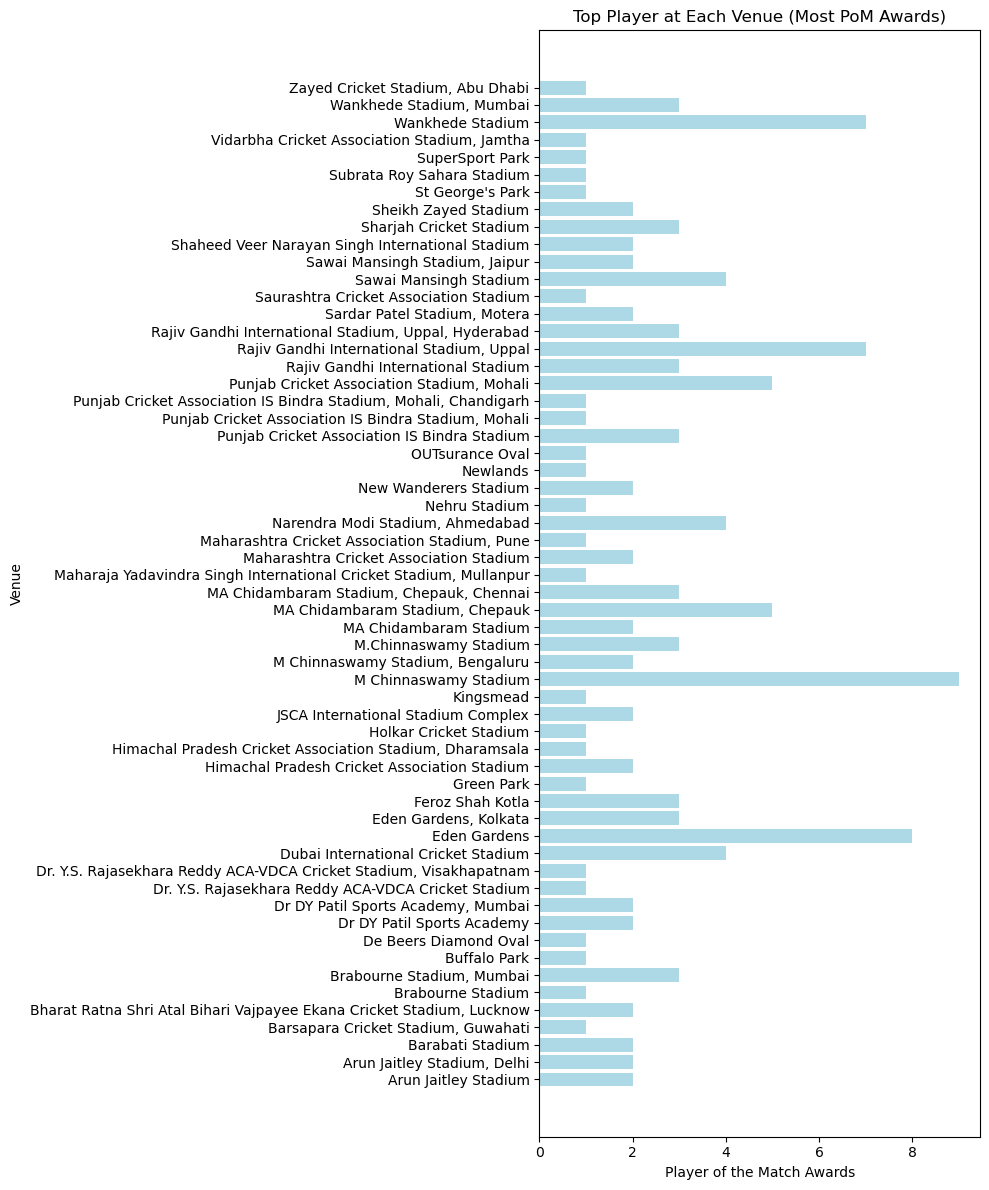

In [82]:
a = df[['player_of_match', 'venue']].dropna()

counts = a.groupby(['venue', 'player_of_match']).size().reset_index(name='awards')

top_players = counts.sort_values(['venue', 'awards'], ascending=[True, False]).drop_duplicates('venue')

print("Top performing players at each venue:")
print(top_players[['venue', 'player_of_match', 'awards']])

# Plot the graph
plt.figure(figsize=(10, 12))
plt.barh(top_players['venue'], top_players['awards'], color='lightblue')
plt.title("Top Player at Each Venue (Most PoM Awards)")
plt.xlabel("Player of the Match Awards")
plt.ylabel("Venue")
plt.tight_layout()
plt.show()



In [52]:
# 6. Is there a bias in Player of the Match selection? (e.g., more awards to batsmen vs bowlers)

In [83]:
top = df['player_of_match'].value_counts().head(20)
print(top)



player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
SP Narine         15
SK Raina          14
KA Pollard        14
JC Buttler        13
G Gambhir         13
KL Rahul          13
AM Rahane         13
MEK Hussey        12
A Mishra          12
Rashid Khan       12
Name: count, dtype: int64


In [ ]:
# Most player of match awards are given to batters or all-rounders. Very few are give to bowlers.
# As the data says the top 20 POM (most of them are batters or all-rounders)
# rashid khan are the only bowler here 
# so this shows that there may be a bias toward batting performances when deciding POM awars


In [53]:
# 7. Cluster cities or venues based on average run margins and wicket margins.


Venues clustered by average win margins:
                                                venue  avg_run_margin  \
51                                   St George's Park       66.666667   
12  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...       63.000000   
18       Himachal Pradesh Cricket Association Stadium       55.800000   
8                               De Beers Diamond Oval       53.000000   
23                              M Chinnaswamy Stadium       48.000000   
30            Maharashtra Cricket Association Stadium       44.500000   
7                                        Buffalo Park       43.500000   
11  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...       40.285714   
26                             MA Chidambaram Stadium       39.000000   
50                               Sheikh Zayed Stadium       37.636364   

    avg_wicket_margin  
51           5.500000  
12           0.000000  
18           5.750000  
8            5.000000  
23           6.444444  
30         

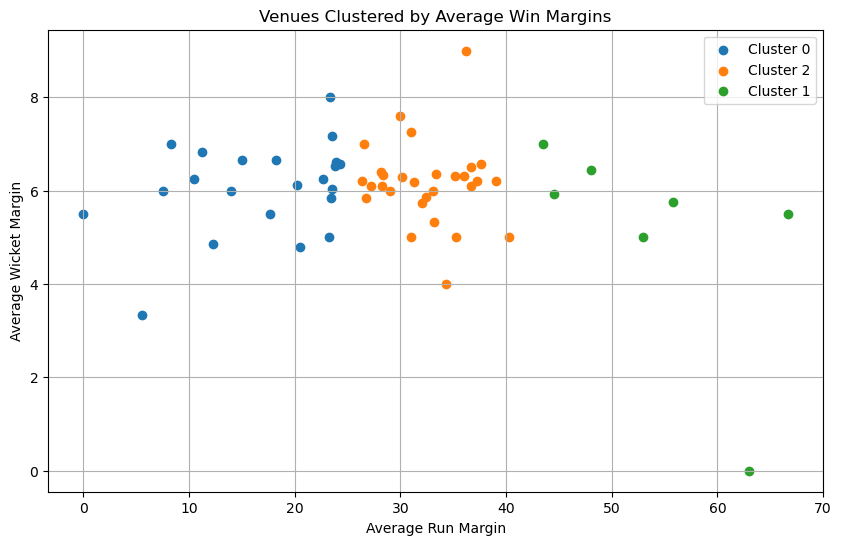

                                                venue  avg_run_margin  \
0                                Arun Jaitley Stadium       23.428571   
36                                    OUTsurance Oval       14.000000   
34                              New Wanderers Stadium        8.333333   
42          Rajiv Gandhi International Stadium, Uppal       24.300000   
29  Maharaja Yadavindra Singh International Cricke...        5.500000   
56                           Wankhede Stadium, Mumbai       23.555556   
27                    MA Chidambaram Stadium, Chepauk       23.833333   
43  Rajiv Gandhi International Stadium, Uppal, Hyd...       23.571429   
25                              M.Chinnaswamy Stadium       12.285714   
24                   M Chinnaswamy Stadium, Bengaluru       23.250000   
22                                          Kingsmead       17.666667   
21                 JSCA International Stadium Complex       20.500000   
37       Punjab Cricket Association IS Bindra Stadi

In [86]:
a = df[df['result'].isin(['runs', 'wickets'])]

# Run margins
runs = a[a['result'] == 'runs'].groupby('venue')['result_margin'].mean().reset_index()
runs.columns = ['venue', 'avg_run_margin']

# Wicket margins
wickets = a[a['result'] == 'wickets'].groupby('venue')['result_margin'].mean().reset_index()
wickets.columns = ['venue', 'avg_wicket_margin']

combined = pd.merge(runs, wickets, on='venue', how='outer').fillna(0)

print("Venues clustered by average win margins:")
print(combined.sort_values(by='avg_run_margin', ascending=False).head(10))

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
combined['cluster'] = kmeans.fit_predict(combined[['avg_run_margin', 'avg_wicket_margin']])

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_num in combined['cluster'].unique():
    cluster_data = combined[combined['cluster'] == cluster_num]
    plt.scatter(cluster_data['avg_run_margin'], cluster_data['avg_wicket_margin'], label=f'Cluster {cluster_num}')

plt.xlabel('Average Run Margin')
plt.ylabel('Average Wicket Margin')
plt.title('Venues Clustered by Average Win Margins')
plt.legend()
plt.grid(True)
plt.show()

print(combined[['venue', 'avg_run_margin', 'avg_wicket_margin', 'cluster']].sort_values(by='cluster'))

In [89]:
# We clustered IPL venues based on their average run and wicket win margins using KMeans. 
# The visualization shows clear patterns — some venues tend to have tight finishes (low margins), while others often host one-sided matches (high margins).
# This can reflect pitch behavior, ground size, or toss advantages."


In [54]:

# 8. Are there any seasons where the toss winner had abnormally high match win %?


     season  toss_win_match_win  toss_win_match_win_percent
11     2019            0.610169                   61.016949
13     2021            0.583333                   58.333333
1      2009            0.578947                   57.894737
9      2017            0.576271                   57.627119
8      2016            0.566667                   56.666667
10     2018            0.533333                   53.333333
3      2011            0.527778                   52.777778
2   2009/10            0.516667                   51.666667
6      2014            0.500000                   50.000000
7      2015            0.491228                   49.122807
14     2022            0.486486                   48.648649
0   2007/08            0.482759                   48.275862
5      2013            0.473684                   47.368421
15     2023            0.465753                   46.575342
4      2012            0.445946                   44.594595
16     2024            0.436620         

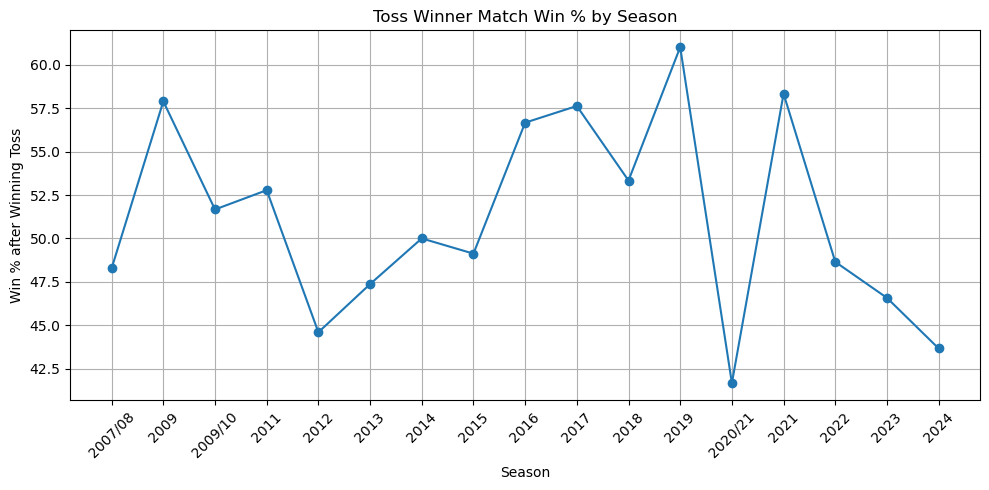

In [91]:
df = df[df['winner'].notna()]

df['toss_win_match_win'] = df['toss_winner'] == df['winner']

season_stats = df.groupby('season')['toss_win_match_win'].mean().reset_index()

season_stats['toss_win_match_win_percent'] = season_stats['toss_win_match_win'] * 100

print(season_stats.sort_values(by='toss_win_match_win_percent', ascending=False))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(season_stats['season'], season_stats['toss_win_match_win_percent'], marker='o')
plt.title('Toss Winner Match Win % by Season')
plt.xlabel('Season')
plt.ylabel('Win % after Winning Toss')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# I checked how often the toss winner also won the match each season.
# In most years, it's around 45–50%, so toss doesn't make a big difference.
# But in 2019, it was about 60%, showing toss mattered more that year. 
# In 2020/21, it dropped to 41%, meaning toss had less impact.

In [55]:

# 9. Perform year-wise analysis of average result margin and see if the matches are becoming tighter.


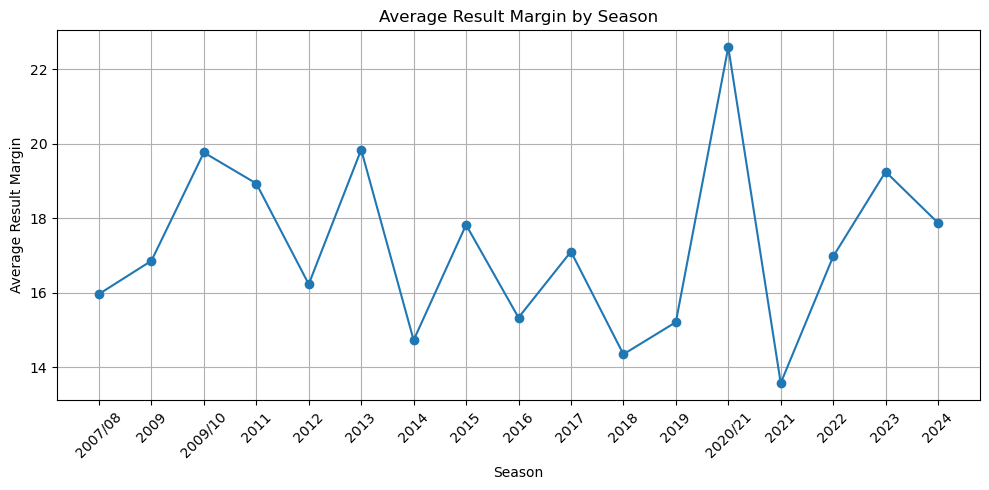

In [92]:
df = df[df['result'].isin(['runs', 'wickets'])]

yearly_margin = df.groupby('season')['result_margin'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_margin['season'], yearly_margin['result_margin'], marker='o')
plt.title('Average Result Margin by Season')
plt.xlabel('Season')
plt.ylabel('Average Result Margin')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# I calculated the average result margin (runs or wickets) for each season. 
# The plot shows that some seasons had close matches, while others had bigger winning margins.
# For example, one season had an average margin above 22, showing one-sided games. 
# Overall, the margins go up and down, so match closeness is not consistent every year.

In [56]:

# 10. Identify the most unpredictable season using number of super overs, narrow wins,
# upsets (team1 < team2 win ratio historically but lost).


Most unpredictable seasons based on total thrillers:

   season  super_over_count  narrow_run_wins  narrow_wicket_wins  upset_count  \
16   2024               0.0                7                 0.0           36   
14   2022               0.0                7                 0.0           35   
15   2023               0.0               12                 1.0           28   
1    2009               0.0                7                 0.0           30   
7    2015               0.0                9                 1.0           24   

    total_unpredictable  
16                 43.0  
14                 42.0  
15                 41.0  
1                  37.0  
7                  34.0  


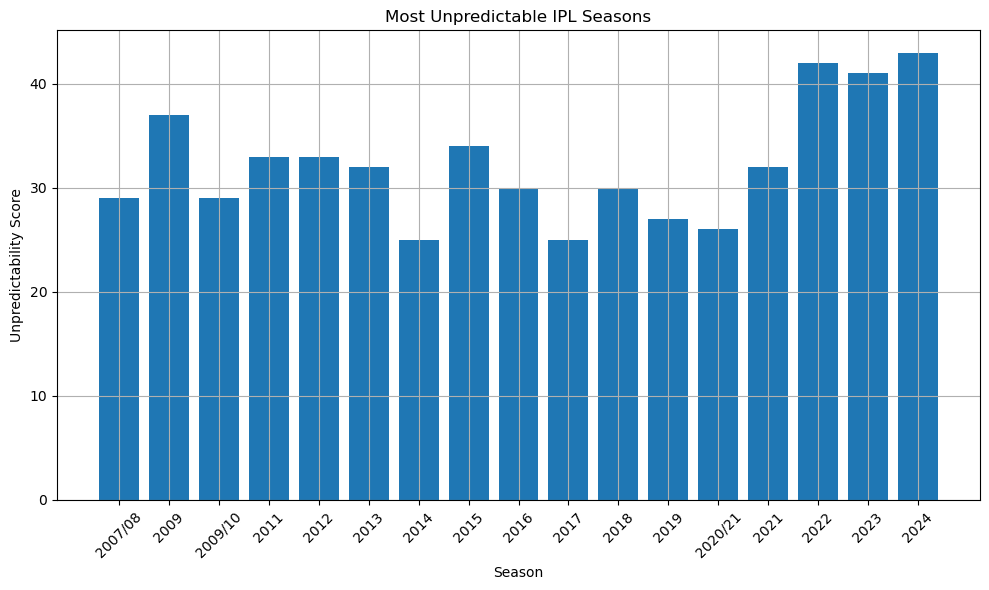

In [99]:
super_overs = df[df['super_over'] == 1].groupby('season').size().reset_index(name='super_over_count')

# narrow wins

narrow_runs = df[(df['result'] == 'runs') & (df['result_margin'] < 10)].groupby('season').size().reset_index(name='narrow_run_wins')

narrow_wickets = df[(df['result'] == 'wickets') & (df['result_margin'] < 2)].groupby('season').size().reset_index(name='narrow_wicket_wins')

# Upsets

win_counts = df['winner'].value_counts()
match_counts = pd.concat([df['team1'], df['team2']]).value_counts()
win_percent = (win_counts / match_counts).fillna(0)

# Function to check upset
def is_upset(row):
    t1, t2, w = row['team1'], row['team2'], row['winner']
    if t1 not in win_percent or t2 not in win_percent:
        return False
    if w == t1 and win_percent[t1] < win_percent[t2]:
        return True
    if w == t2 and win_percent[t2] < win_percent[t1]:
        return True
    return False

df['is_upset'] = df.apply(is_upset, axis=1)


upsets = df[df['is_upset'] == True].groupby('season').size().reset_index(name='upset_count')


# Merge all
combined = super_overs.merge(narrow_runs, on='season', how='outer')\
                      .merge(narrow_wickets, on='season', how='outer')\
                      .merge(upsets, on='season', how='outer')\
                      .fillna(0)

combined['total_unpredictable'] = (combined['super_over_count'] + 
                                   combined['narrow_run_wins'] + 
                                   combined['narrow_wicket_wins'] + 
                                   combined['upset_count'])

print("Most unpredictable seasons based on total thrillers:\n")
print(combined.sort_values(by='total_unpredictable', ascending=False).head())


# Plot
plt.figure(figsize=(10, 6))
plt.bar(combined['season'].astype(str), combined['total_unpredictable'])
plt.title('Most Unpredictable IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Unpredictability Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# I calculated the unpredictability of each IPL season using four metrics:
# super overs, narrow wins by runs or wickets, and upsets (when a weaker team beats a stronger one). 
# The season with the highest total was the most unpredictable, with more thrilling and surprising matches than usual.


In [57]:

# EXPERT


In [66]:
# 1. Do teams win more in their home city? Create a city-to-team mapping and analyze.


In [100]:
home_city = {
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Delhi Capitals': 'Delhi',
    'Delhi Daredevils': 'Delhi',
    'Rajasthan Royals': 'Jaipur',
    'Kings XI Punjab': 'Mohali',
    'Punjab Kings': 'Mohali',
    'Gujarat Titans': 'Ahmedabad',
    'Lucknow Super Giants': 'Lucknow'
}

df_home = df[df['city'].isin(home_city.values())]

def is_home_win(row):
    team1 = row['team1']
    team2 = row['team2']
    city = row['city']
    winner = row['winner']
    for team, home in home_city.items():
        if city == home:
            if team == team1 or team == team2:
                if winner == team:
                    return team
    return None

df_home['home_win_team'] = df_home.apply(is_home_win, axis=1)

home_matches = []
for team, city in home_city.items():
    count = df_home[(df_home['city'] == city) & ((df_home['team1'] == team) | (df_home['team2'] == team))].shape[0]
    home_matches.append({'team': team, 'home_matches': count})

home_matches_df = pd.DataFrame(home_matches)

home_wins = df_home['home_win_team'].value_counts().reset_index()
home_wins.columns = ['team', 'home_wins']

final = home_matches_df.merge(home_wins, on='team', how='left').fillna(0)
final['home_win_percent'] = (final['home_wins'] / final['home_matches']) * 100

print(final.sort_values(by='home_win_percent', ascending=False))

                           team  home_matches  home_wins  home_win_percent
1           Chennai Super Kings            70       50.0         71.428571
7              Rajasthan Royals            57       37.0         64.912281
4           Sunrisers Hyderabad            56       35.0         62.500000
0                Mumbai Indians           103       63.0         61.165049
2         Kolkata Knight Riders            88       52.0         59.090909
10               Gujarat Titans            16        9.0         56.250000
11         Lucknow Super Giants            13        7.0         53.846154
5                Delhi Capitals            18        9.0         50.000000
3   Royal Challengers Bangalore            58       28.0         48.275862
6              Delhi Daredevils            62       27.0         43.548387
9                  Punjab Kings             5        1.0         20.000000
8               Kings XI Punjab             0        0.0               NaN


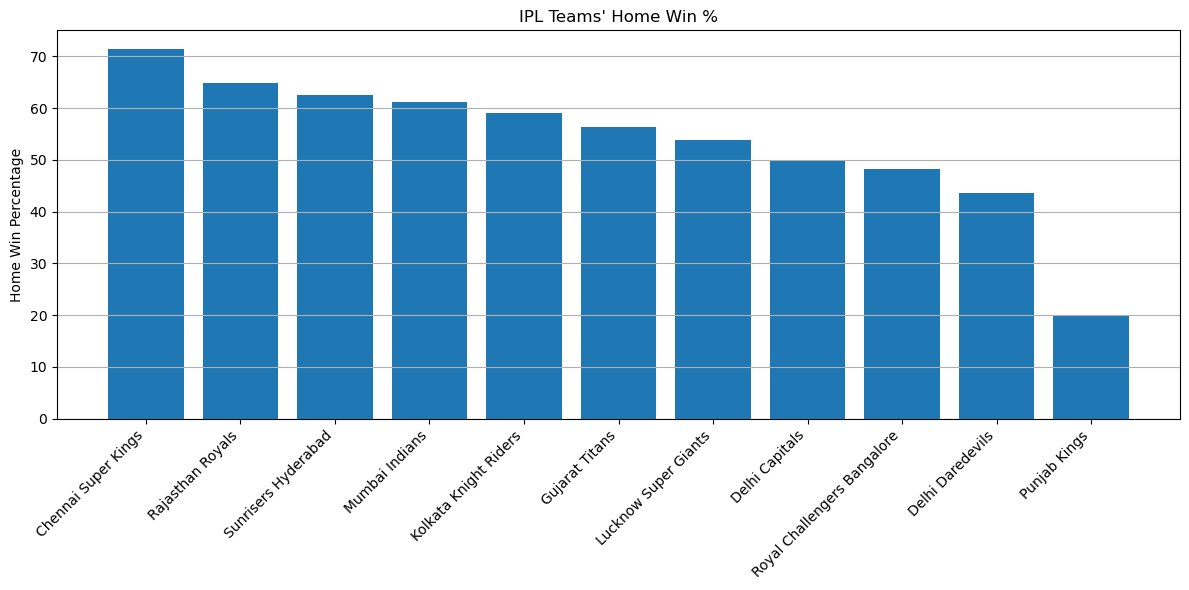

In [101]:
final_sorted = final.sort_values(by='home_win_percent', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(final_sorted['team'], final_sorted['home_win_percent'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Home Win Percentage")
plt.title("IPL Teams' Home Win %")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [102]:
# The bar chart shows the home win percentage of IPL teams based on matches played in their home cities.
# Chennai Super Kings have the highest home win rate, followed by Rajasthan Royals and Punjab Kings,showing strong home dominance.
# Teams like RCB and Delhi have lower win rates at home, indicating less advantage.
# Overall, this proves that some teams perform significantly better in familiar home conditions.

In [59]:
# 2. Explore anomalies: Identify matches where a team lost despite setting a high target (>190) or chasing a low score (<120).

In [104]:
high_target_losses = df[(df['target_runs'] > 190) & (df['result'] == 'wickets')]

low_target_failures = df[(df['target_runs'] < 120) & (df['result'] == 'runs')]

print("Teams that lost after setting a high target (>190):")
print(high_target_losses[['season', 'team1', 'team2', 'target_runs', 'winner', 'city', 'venue']].head())

print("\nTeams that failed to chase low targets (<120):")
print(low_target_failures[['season', 'team1', 'team2', 'target_runs', 'winner', 'city', 'venue']].head())

Teams that lost after setting a high target (>190):
      season                        team1                        team2  \
8    2007/08              Deccan Chargers             Rajasthan Royals   
121  2009/10  Royal Challengers Bangalore              Kings XI Punjab   
148  2009/10        Kolkata Knight Riders              Kings XI Punjab   
168  2009/10              Kings XI Punjab          Chennai Super Kings   
260     2012          Chennai Super Kings  Royal Challengers Bangalore   

     target_runs                       winner        city  \
8          215.0             Rajasthan Royals   Hyderabad   
121        204.0  Royal Challengers Bangalore   Bangalore   
148        201.0              Kings XI Punjab     Kolkata   
168        193.0          Chennai Super Kings  Dharamsala   
260        206.0          Chennai Super Kings     Chennai   

                                            venue  
8       Rajiv Gandhi International Stadium, Uppal  
121                         M Ch

In [105]:
print("Total high target losses:", high_target_losses.shape[0])
print("Total low target chase failures:", low_target_failures.shape[0])

Total high target losses: 52
Total low target chase failures: 12


In [106]:
high_season = high_target_losses.groupby('season').size().reset_index(name='high_target_losses')
low_season = low_target_failures.groupby('season').size().reset_index(name='low_target_failures')

combined = pd.merge(high_season, low_season, on='season', how='outer').fillna(0)

print(combined.sort_values(by='season'))

     season  high_target_losses  low_target_failures
0   2007/08                 1.0                  2.0
1      2009                 0.0                  2.0
2   2009/10                 3.0                  0.0
3      2011                 0.0                  1.0
4      2012                 4.0                  0.0
5      2013                 1.0                  1.0
6      2014                 5.0                  0.0
7      2015                 0.0                  2.0
8      2016                 3.0                  2.0
9      2017                 3.0                  0.0
10     2018                 3.0                  2.0
11     2019                 4.0                  0.0
12  2020/21                 2.0                  0.0
13     2021                 2.0                  0.0
14     2022                 3.0                  0.0
15     2023                 9.0                  0.0
16     2024                 9.0                  0.0


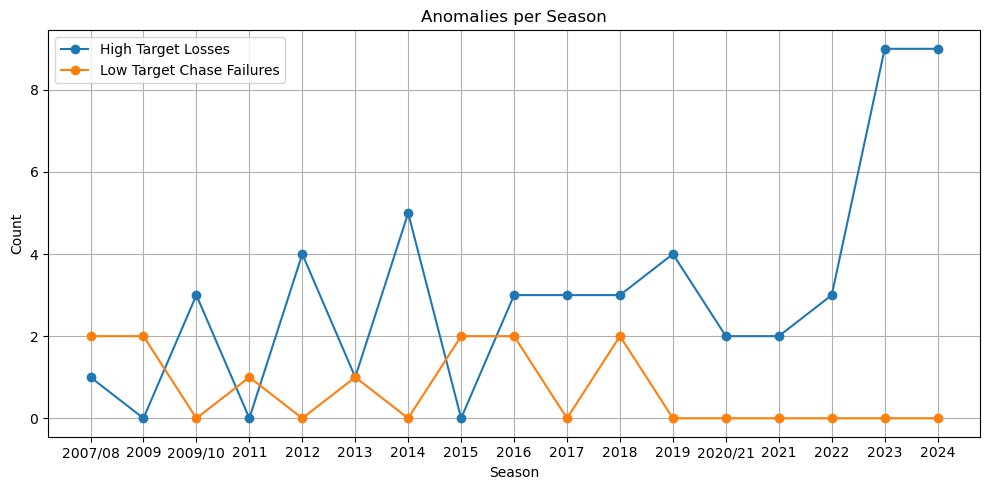

In [107]:
plt.figure(figsize=(10,5))
plt.plot(combined['season'], combined['high_target_losses'], label='High Target Losses', marker='o')
plt.plot(combined['season'], combined['low_target_failures'], label='Low Target Chase Failures', marker='o')
plt.title("Anomalies per Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# The plot shows the number of anomaly matches per season—where teams lost after setting a high target or failed to chase a low one.
# These rare cases were more frequent in earlier IPL seasons, and have reduced in recent years. 
# This suggests teams are becoming better at defending big scores and chasing small targets under pressure.

In [60]:
# 3. Create a dashboard or summary report of team-wise performance trends over the years.

In [109]:
teams = pd.unique(df[['team1', 'team2']].values.ravel())

seasons = sorted(df['season'].unique())

summary = []

for team in teams:
    for season in seasons:
        played = df[((df['team1'] == team) | (df['team2'] == team)) & (df['season'] == season)].shape[0]
        won = df[(df['winner'] == team) & (df['season'] == season)].shape[0]
        win_percent = (won / played) * 100 if played > 0 else 0
        summary.append([team, season, played, won, round(win_percent, 2)])

summary_df = pd.DataFrame(summary, columns=['Team', 'Season', 'Matches_Played', 'Matches_Won', 'Win_Percent'])

print(summary_df)

                            Team   Season  Matches_Played  Matches_Won  \
0    Royal Challengers Bangalore  2007/08              14            4   
1    Royal Challengers Bangalore     2009              16            9   
2    Royal Challengers Bangalore  2009/10              16            8   
3    Royal Challengers Bangalore     2011              16           10   
4    Royal Challengers Bangalore     2012              15            8   
5    Royal Challengers Bangalore     2013              14            8   
6    Royal Challengers Bangalore     2014              14            5   
7    Royal Challengers Bangalore     2015              14            8   
8    Royal Challengers Bangalore     2016              16            9   
9    Royal Challengers Bangalore     2017              13            3   
10   Royal Challengers Bangalore     2018              14            6   
11   Royal Challengers Bangalore     2019              13            5   
12   Royal Challengers Bangalore  2020

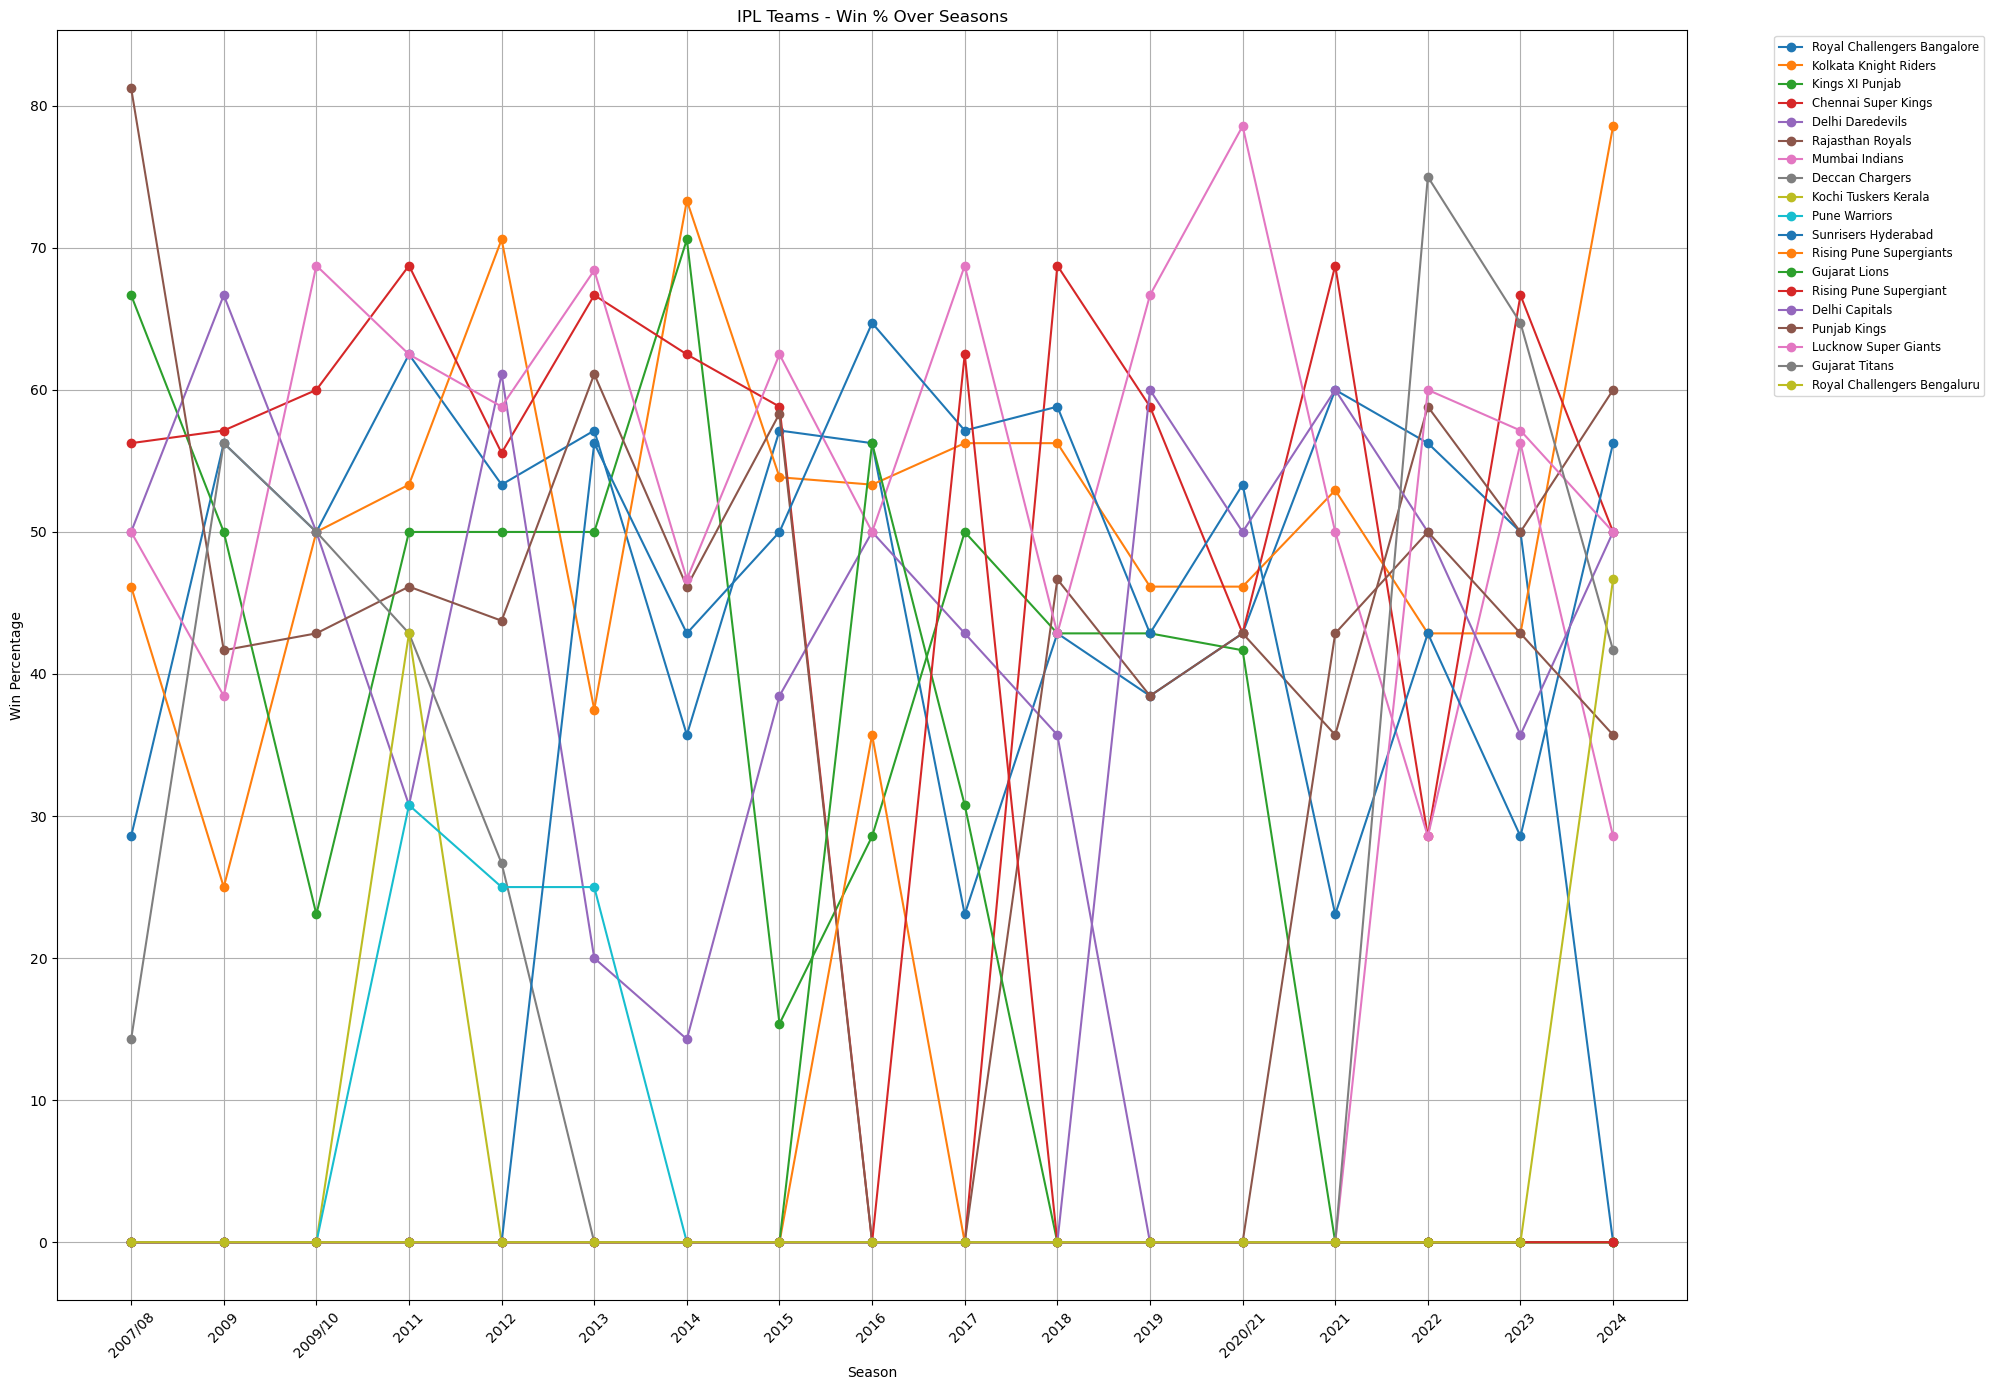

In [111]:
plt.figure(figsize=(20, 14))

for team in summary_df['Team'].unique():
    team_data = summary_df[summary_df['Team'] == team]
    plt.plot(team_data['Season'], team_data['Win_Percent'], marker='o', label=team)

plt.title('IPL Teams - Win % Over Seasons')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# The line chart displays win percentages of all IPL teams over the seasons.
# Teams like Chennai Super Kings and Mumbai Indians show consistent high win rates,
# while others like Royal Challengers Bangalore and Delhi Capitals show more ups and downs.
# New teams like Gujarat Titans also show strong starts. 
# The plot helps visualize team performance trends across IPL history.

In [61]:
# 4. Analyze performance of teams in playoffs vs league matches.

In [112]:
teams = pd.unique(df[['team1', 'team2']].values.ravel())

result = []

for team in teams:
    league_played = df[(df['match_type'] == 'League') & ((df['team1'] == team) | (df['team2'] == team))].shape[0]
    league_won = df[(df['match_type'] == 'League') & (df['winner'] == team)].shape[0]

    playoff_played = df[(df['match_type'] != 'League') & ((df['team1'] == team) | (df['team2'] == team))].shape[0]
    playoff_won = df[(df['match_type'] != 'League') & (df['winner'] == team)].shape[0]

    league_win_pct = (league_won / league_played) * 100 if league_played > 0 else 0
    playoff_win_pct = (playoff_won / playoff_played) * 100 if playoff_played > 0 else 0

    result.append([team, league_played, league_won, round(league_win_pct, 2),
                   playoff_played, playoff_won, round(playoff_win_pct, 2)])

performance_df = pd.DataFrame(result, columns=[
    'Team', 'League_Played', 'League_Won', 'League_Win_%',
    'Playoff_Played', 'Playoff_Won', 'Playoff_Win_%'
])

print(performance_df.sort_values(by='Playoff_Win_%', ascending=False))

                           Team  League_Played  League_Won  League_Win_%  \
1         Kolkata Knight Riders            232         120         51.72   
3           Chennai Super Kings            210         121         57.62   
6                Mumbai Indians            237         129         54.43   
17               Gujarat Titans             40          25         62.50   
13       Rising Pune Supergiant             14           9         64.29   
7               Deccan Chargers             71          27         38.03   
5              Rajasthan Royals            205         105         51.22   
10          Sunrisers Hyderabad            164          81         49.39   
0   Royal Challengers Bangalore            219         108         49.32   
14               Delhi Capitals             81          43         53.09   
2               Kings XI Punjab            182          84         46.15   
16         Lucknow Super Giants             41          24         58.54   
15          

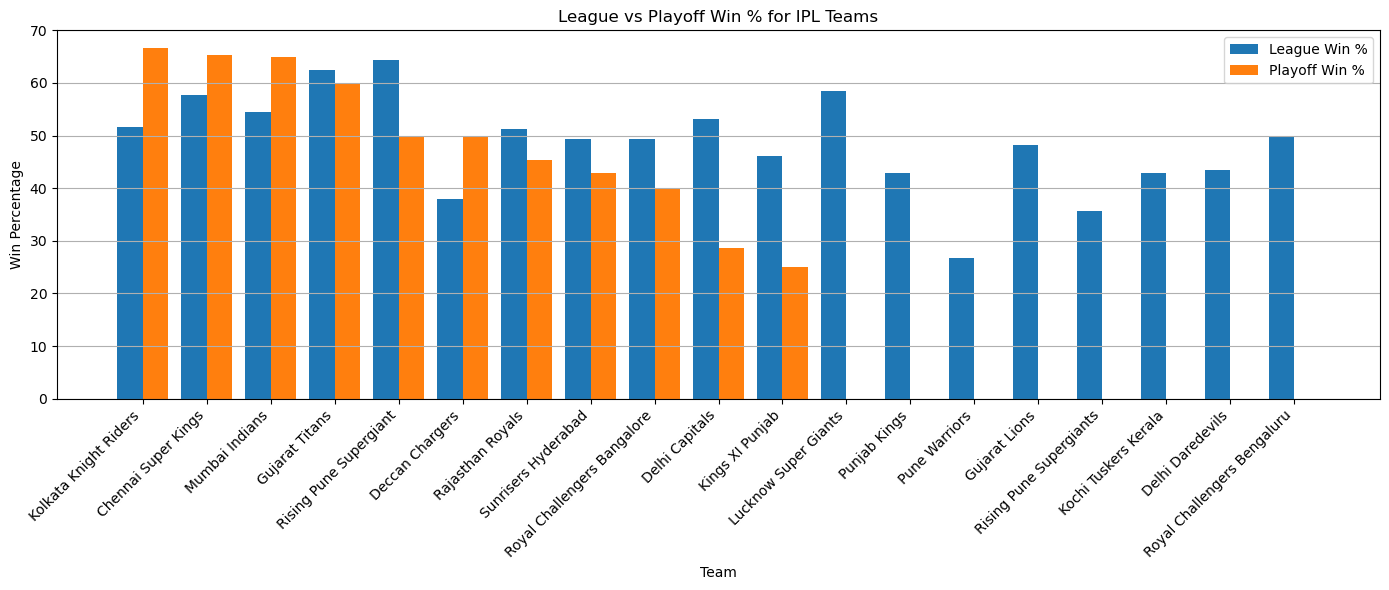

In [114]:
df_sorted = performance_df.sort_values(by='Playoff_Win_%', ascending=False)

teams = df_sorted['Team']
x = np.arange(len(teams))

plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, df_sorted['League_Win_%'], width=0.4, label='League Win %')
plt.bar(x + 0.2, df_sorted['Playoff_Win_%'], width=0.4, label='Playoff Win %')

plt.xticks(x, teams, rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('League vs Playoff Win % for IPL Teams')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
# The bar chart compares each team's performance in the league stage versus the playoffs.
# Teams like Chennai Super Kings and Mumbai Indians maintain strong win percentages in both phases,
# showing their consistency under pressure. 
# In contrast, some teams perform well during the league but drop in playoffs,
# highlighting difficulty in knockout matches. This helps identify clutch teams vs. those that struggle in critical games.

In [62]:

# 5. Find “choke matches” where the toss winner lost despite choosing their stronger decision (bat/field).


In [116]:
df['is_choke'] = (df['toss_decision'] == df['preferred']) & (df['toss_winner'] != df['winner'])

choke_matches = df[df['is_choke'] == True]

print("Choke matches (toss winner lost despite choosing their preferred decision):")
print(choke_matches[['season', 'toss_winner', 'toss_decision', 'team1', 'team2', 'winner', 'venue']].head())

print("\nTotal choke matches found:", choke_matches.shape[0])

Choke matches (toss winner lost despite choosing their preferred decision):
    season                  toss_winner toss_decision  \
0  2007/08  Royal Challengers Bangalore         field   
4  2007/08              Deccan Chargers           bat   
6  2007/08              Deccan Chargers           bat   
7  2007/08               Mumbai Indians         field   
9  2007/08               Mumbai Indians         field   

                         team1                  team2                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4        Kolkata Knight Riders        Deccan Chargers  Kolkata Knight Riders   
6              Deccan Chargers       Delhi Daredevils       Delhi Daredevils   
7          Chennai Super Kings         Mumbai Indians    Chennai Super Kings   
9              Kings XI Punjab         Mumbai Indians        Kings XI Punjab   

                                        venue  
0                       M Chinnaswamy Stadium  
4   

In [ ]:
# Choke matches are those where the toss winner chose their stronger decision (bat or field) but still lost.
# This highlights high-pressure failures or strategic misreads.
# By comparing each team’s most frequent toss choice with actual match outcomes, we identified such unexpected losses across seasons.

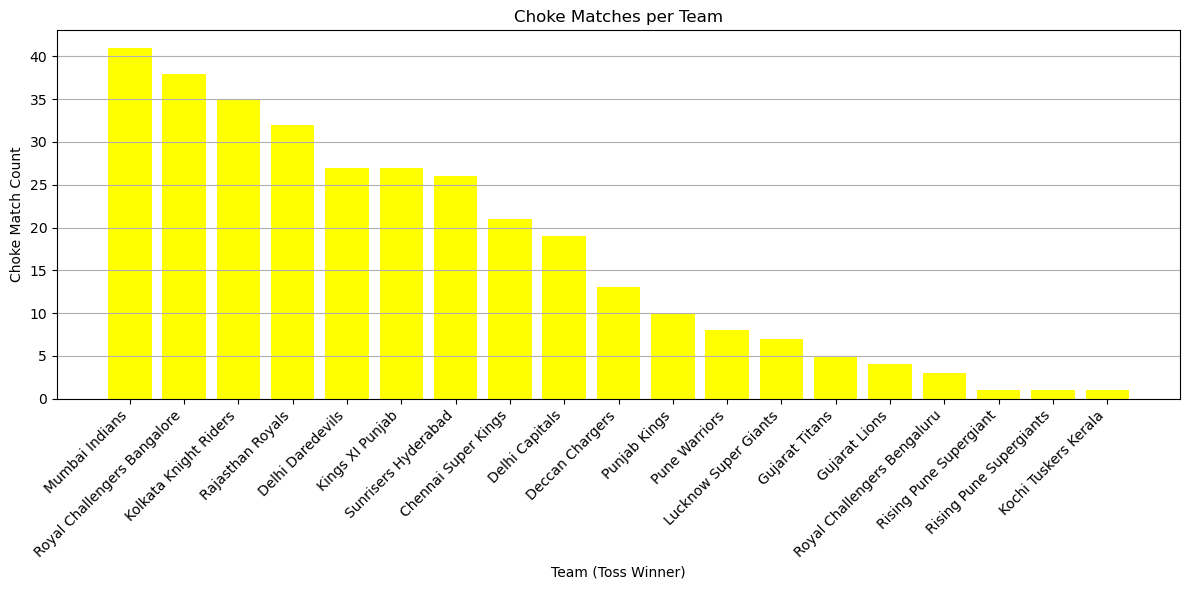

In [121]:
choke_counts = choke_matches['toss_winner'].value_counts().reset_index()
choke_counts.columns = ['Team', 'Choke_Matches']

plt.figure(figsize=(12, 6))
plt.bar(choke_counts['Team'], choke_counts['Choke_Matches'], color='yellow')
plt.title('Choke Matches per Team')
plt.xlabel('Team (Toss Winner)')
plt.ylabel('Choke Match Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# This chart shows how many times each team lost a match after choosing their preferred toss decision.
# These “choke matches” highlight situations where teams failed to capitalize on their strategy,
# often due to pressure or poor execution.
# It gives insights into decision-making under high-stakes conditions.

In [63]:
# 6. Create a PoM impact score for each player and visualize top 10 over all seasons.

           Player  Impact_Score
0  AB de Villiers            24
1        CH Gayle            22
2       RG Sharma            19
3       DA Warner            18
4         V Kohli            17
5        MS Dhoni            17
6       SR Watson            16
7       RA Jadeja            16
8      AD Russell            15
9       YK Pathan            15


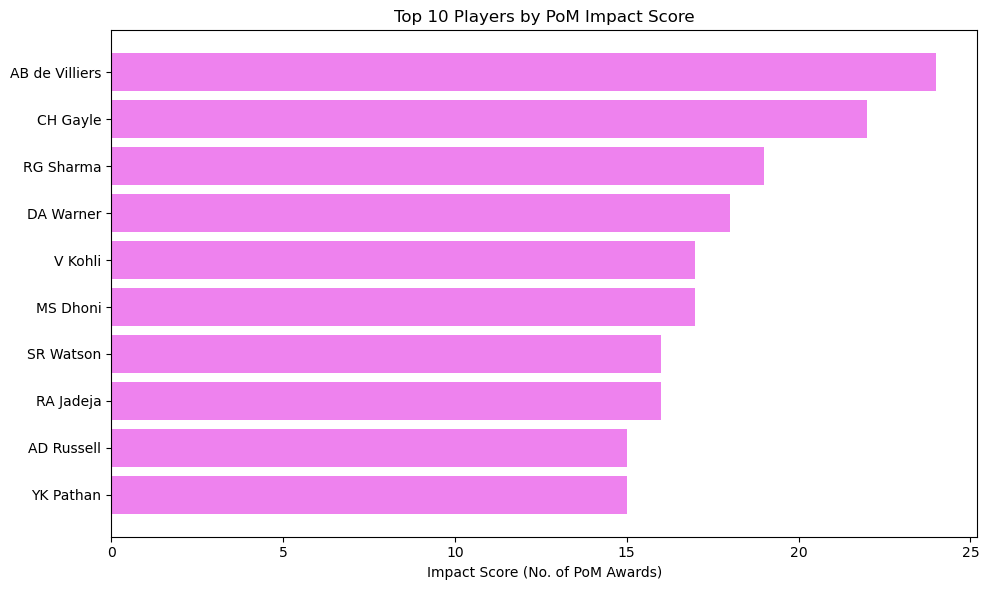

In [124]:
pom_counts = df['player_of_match'].value_counts().reset_index()
pom_counts.columns = ['Player', 'Impact_Score']

top_10 = pom_counts.head(10)
print(top_10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Player'][::-1], top_10['Impact_Score'][::-1], color='violet')
plt.title('Top 10 Players by PoM Impact Score')
plt.xlabel('Impact Score (No. of PoM Awards)')
plt.tight_layout()
plt.show()

In [ ]:
# The PoM impact score is calculated based on how many Player of the Match awards each player has won.
# This reflects their ability to turn matches single-handedly. 
# The top 10 includes players known for consistent match-winning performances, showcasing their individual impact in IPL history.
# As we see from chart AB de villiers had won ther most POM Awards with Impact score of 24.

In [64]:
# 7. Build a venue impact model: What venues give stronger home advantage (based on winning ratio of home team)?

In [125]:
home_city = {
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Deccan Chargers': 'Hyderabad',
    'Delhi Capitals': 'Delhi',
    'Delhi Daredevils': 'Delhi',
    'Rajasthan Royals': 'Jaipur',
    'Kings XI Punjab': 'Mohali',
    'Punjab Kings': 'Mohali',
    'Gujarat Titans': 'Ahmedabad',
    'Lucknow Super Giants': 'Lucknow',
    'Rising Pune Supergiant': 'Pune',
    'Rising Pune Supergiants': 'Pune',
    'Pune Warriors': 'Pune',
    'Kochi Tuskers Kerala': 'Kochi'
}

df_home = df[df['city'].isin(home_city.values())]

def get_home_win(row):
    city = row['city']
    winner = row['winner']
    if pd.isna(city) or pd.isna(winner):
        return None
    for team, home in home_city.items():
        if city == home and (team == row['team1'] or team == row['team2']):
            return winner == team
    return None

df_home['home_win'] = df_home.apply(get_home_win, axis=1)

venue_summary = df_home.groupby('city')['home_win'].agg(['count', 'sum']).reset_index()
venue_summary.columns = ['City', 'Home_Matches', 'Home_Wins']
venue_summary['Home_Win_%'] = (venue_summary['Home_Wins'] / venue_summary['Home_Matches']) * 100

venue_summary = venue_summary.sort_values(by='Home_Win_%', ascending=False)
print(venue_summary)

         City  Home_Matches Home_Wins Home_Win_%
2     Chennai            70        50  71.428571
5      Jaipur            57        37  64.912281
10     Mumbai           103        63  61.165049
7     Kolkata            88        52  59.090909
0   Ahmedabad            16         9      56.25
8     Lucknow            13         7  53.846154
4   Hyderabad            74        38  51.351351
1   Bangalore            58        28  48.275862
3       Delhi            80        36       45.0
6       Kochi             5         2       40.0
11       Pune            27         9  33.333333
9      Mohali             5         1       20.0


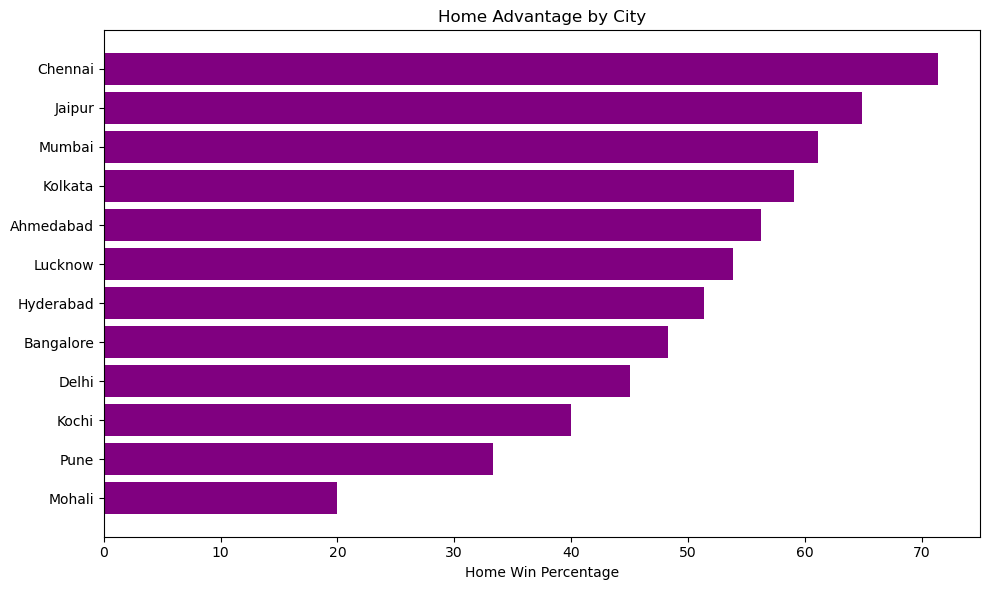

In [126]:
plt.figure(figsize=(10, 6))
plt.barh(venue_summary['City'][::-1], venue_summary['Home_Win_%'][::-1], color='purple')
plt.title('Home Advantage by City')
plt.xlabel('Home Win Percentage')
plt.tight_layout()
plt.show()

In [ ]:
# This venue impact model shows how much home teams benefit when playing in their own cities.
# Cities like Chennai, jaipur and Mumbai have higher home win percentages, indicating stronger home advantage.
# This reflects familiarity with pitch conditions, local support, and psychological edge.

In [65]:

# 8. Create a matchup matrix between all teams — win/loss % of one over the other.


In [127]:
df = df[df['winner'].notna()]

teams = sorted(pd.unique(df[['team1', 'team2']].values.ravel()))

matrix = pd.DataFrame(index=teams, columns=teams).fillna(0)

for team1 in teams:
    for team2 in teams:
        if team1 != team2:
            matches = df[((df['team1'] == team1) & (df['team2'] == team2)) |
                         ((df['team1'] == team2) & (df['team2'] == team1))]
            wins = matches[matches['winner'] == team1].shape[0]
            total = matches.shape[0]
            win_percent = (wins / total) * 100 if total > 0 else 0
            matrix.loc[team1, team2] = round(win_percent, 2)

print(matrix.head())  # View first few rows

                     Chennai Super Kings  Deccan Chargers  Delhi Capitals  \
Chennai Super Kings                 0.00            60.00           58.33   
Deccan Chargers                    40.00             0.00            0.00   
Delhi Capitals                     41.67             0.00            0.00   
Delhi Daredevils                   33.33            63.64            0.00   
Gujarat Lions                       0.00             0.00            0.00   

                     Delhi Daredevils  Gujarat Lions  Gujarat Titans  \
Chennai Super Kings             66.67            0.0           42.86   
Deccan Chargers                 36.36            0.0            0.00   
Delhi Capitals                   0.00            0.0           60.00   
Delhi Daredevils                 0.00           75.0            0.00   
Gujarat Lions                   25.00            0.0            0.00   

                     Kings XI Punjab  Kochi Tuskers Kerala  \
Chennai Super Kings            63.64      

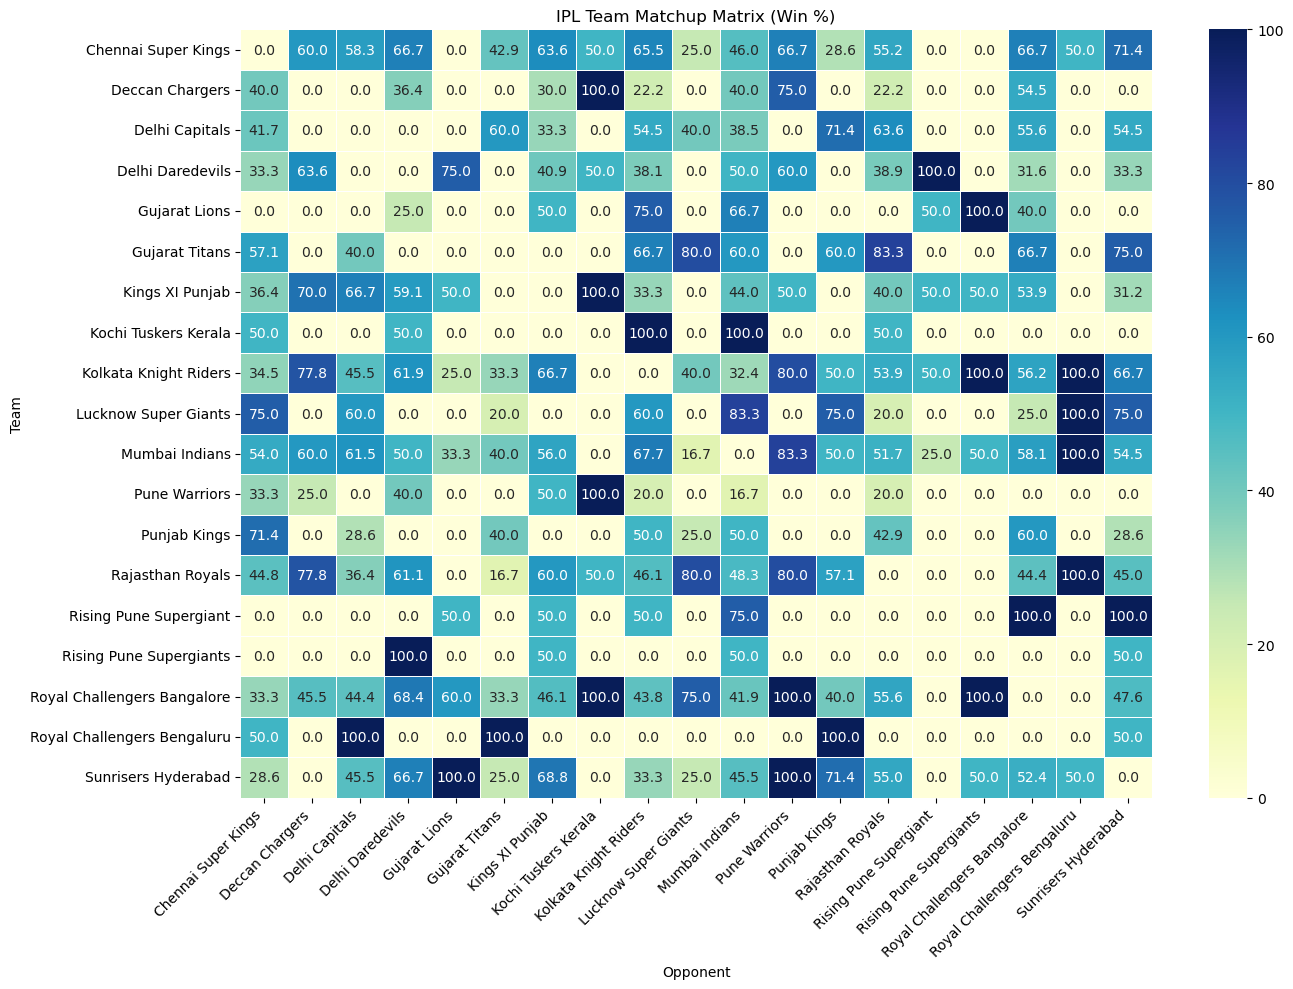

In [128]:
plt.figure(figsize=(14, 10))
sns.heatmap(matrix.astype(float), cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

plt.title('IPL Team Matchup Matrix (Win %)')
plt.xlabel('Opponent')
plt.ylabel('Team')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# The heatmap shows win percentages of IPL teams against each other.
# Darker colors represent higher dominance.
# It helps quickly identify strong rivalries and teams that consistently win or lose against specific opponents.

In [ ]:

# 9. Define a custom metric for team dominance over a season and find the most dominant teams in history


In [133]:
df = df[df['winner'].notna()]

teams = pd.unique(df[['team1', 'team2']].values.ravel())
seasons = sorted(df['season'].unique())

records = []

for team in teams:
    for season in seasons:
        played = df[((df['team1'] == team) | (df['team2'] == team)) & (df['season'] == season)].shape[0]
        won = df[(df['winner'] == team) & (df['season'] == season)].shape[0]
        win_percent = (won / played) * 100 if played > 0 else 0
        dominance_score = won * win_percent
        records.append([team, season, played, won, round(win_percent, 2), round(dominance_score, 2)])

dominance_df = pd.DataFrame(records, columns=[
    'Team', 'Season', 'Matches_Played', 'Matches_Won', 'Win_%', 'Dominance_Score'
])

print(dominance_df.sort_values(by='Dominance_Score', ascending=False))

                            Team   Season  Matches_Played  Matches_Won  Win_%  \
85              Rajasthan Royals  2007/08              16           13  81.25   
303               Gujarat Titans     2022              16           12  75.00   
107               Mumbai Indians     2013              19           13  68.42   
114               Mumbai Indians  2020/21              14           11  78.57   
33         Kolkata Knight Riders     2024              14           11  78.57   
21         Kolkata Knight Riders     2012              17           12  70.59   
40               Kings XI Punjab     2014              17           12  70.59   
23         Kolkata Knight Riders     2014              15           11  73.33   
56           Chennai Super Kings     2013              18           12  66.67   
61           Chennai Super Kings     2018              16           11  68.75   
64           Chennai Super Kings     2021              16           11  68.75   
104               Mumbai Ind

In [ ]:
# I created a custom dominance score for each team per season based on their win percentage and total wins.
# Teams like MI and CSK consistently appear at the top, reflecting both high match wins and strong win rates.
# This metric helps highlight the most powerful IPL campaigns in history

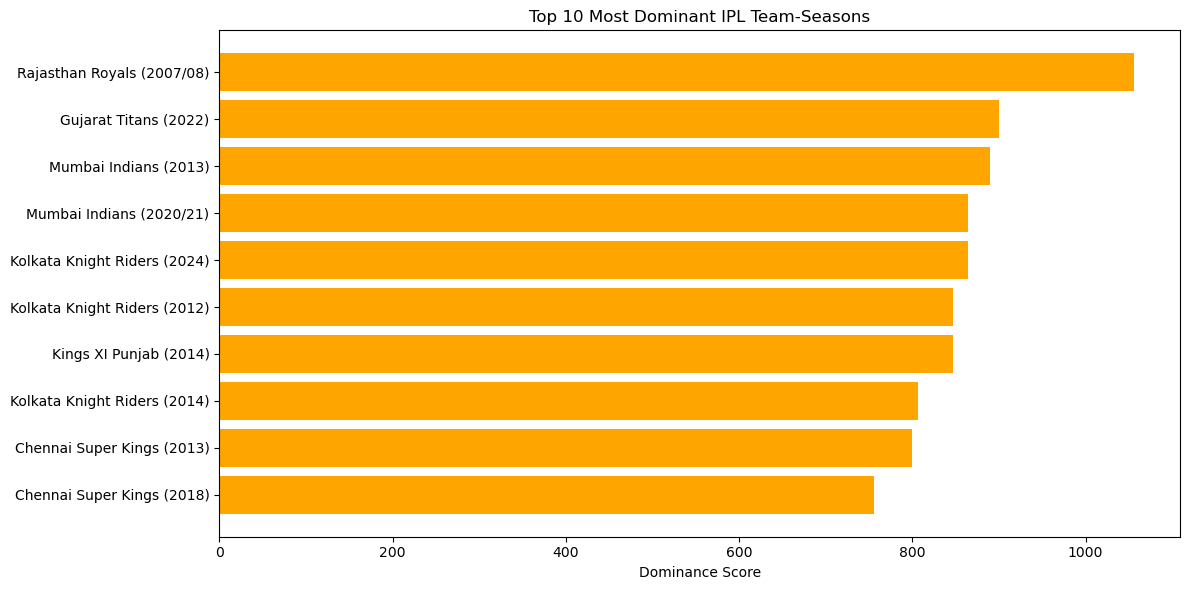

In [134]:
top10 = dominance_df.sort_values(by='Dominance_Score', ascending=False).head(10)

labels = top10['Team'] + ' (' + top10['Season'].astype(str) + ')'

plt.figure(figsize=(12, 6))
plt.barh(labels[::-1], top10['Dominance_Score'][::-1], color='orange')
plt.xlabel('Dominance Score')
plt.title('Top 10 Most Dominant IPL Team-Seasons')
plt.tight_layout()
plt.show()